In [1]:
import numpy as np
import os
from matplotlib import pyplot as plt

In this lab you will apply logistic regression to a dataset of images with the goal of classifying each image as a smile (1) or non-smile (0). We are using a dataset of faces called GENKI.
First, we  download the dataset and explore it.



In [2]:
# Download dataset
# Note: this only needs to be done once!
if not os.path.exists("trainingLabels.npy"):
  !wget https://s3.amazonaws.com/jrwprojects/trainingLabels.npy
  !wget https://s3.amazonaws.com/jrwprojects/testingLabels.npy
  !wget https://s3.amazonaws.com/jrwprojects/trainingFaces.npy
  !wget https://s3.amazonaws.com/jrwprojects/testingFaces.npy

--2025-03-23 17:06:04--  https://s3.amazonaws.com/jrwprojects/trainingLabels.npy
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.106.174, 52.217.204.192, 52.217.202.184, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.106.174|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16080 (16K) [binary/octet-stream]
Saving to: ‘trainingLabels.npy’

trainingLabels.npy  100%[===================>]  15,70K  --.-KB/s    in 0,1s    

2025-03-23 17:06:05 (107 KB/s) - ‘trainingLabels.npy’ saved [16080/16080]

--2025-03-23 17:06:05--  https://s3.amazonaws.com/jrwprojects/testingLabels.npy
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.170.216, 52.217.204.192, 52.217.202.184, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.170.216|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14704 (14K) [binary/octet-stream]
Saving to: ‘testingLabels.npy’

testingLabels.npy   100%[===================>]  14,36K  --.-KB/s    in

In [3]:
# Load dataset
trainingFaces = np.load("trainingFaces.npy")
trainingLabels = np.load("trainingLabels.npy")
testingFaces = np.load("testingFaces.npy")
testingLabels = np.load("testingLabels.npy")
# Print out the dimensions of the arrays
print("trainingFaces shape: ", trainingFaces.shape)
print("trainingLabels shape: ", trainingLabels.shape)
print("testingFaces shape: ", testingFaces.shape)
print("testingLabels shape: ", testingLabels.shape)
# Print out basic statistics
print("Proportion 'smile' in training:", trainingLabels.mean())  # Proportion of training faces that are "smile"
print("Proportion 'smile' in testing:", testingLabels.mean())  # Proportion of testing faces that are "smile"

trainingFaces shape:  (2000, 576)
trainingLabels shape:  (2000,)
testingFaces shape:  (1828, 576)
testingLabels shape:  (1828,)
Proportion 'smile' in training: 0.5355
Proportion 'smile' in testing: 0.5464989059080962


The labels are binary (1 = smile, 0 = non-smile). The images are stored as arrays of grayscale pixel values (each image contains 24*24 = 576 total pixels).

Let's visualize some of the faces. We first have to reshape each image from a 576-dimensional vector (which is convenient for classification with logistic regression) to a 24x24 array (which is convenient for visualization):

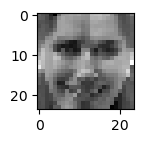

label:  1


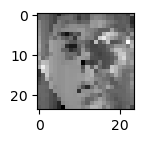

label:  0


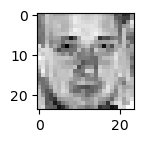

label:  0


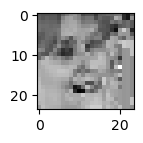

label:  1


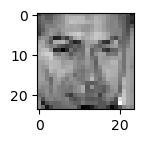

label:  1


In [4]:
for i in range(5):
  # Before rendering, we have to reshape the image vector into a 2-d array
  fig, ax = plt.subplots(figsize=(1.25, 1.25))
  ax.imshow(trainingFaces[i,:].reshape(24, 24), cmap='gray')
  plt.show()
  print("label: ", trainingLabels[i])

In most of the images, the label (smile vs. non-smile) is quite clear. However, in some it is not. Examine the 4 images below, and ask yourself: how would *you* classify them? (Note: you do not need to answer on Moodle.)

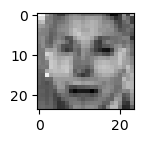

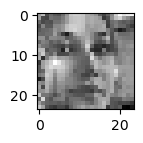

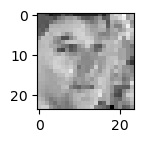

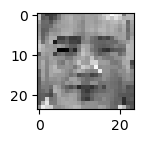

In [5]:
ambiguousIdxs = [ 187, 192, 566, 1401 ]
for idx in ambiguousIdxs:
  fig, ax = plt.subplots(figsize=(1.25, 1.25))
  ax.imshow(testingFaces[idx,:].reshape(24, 24), cmap='gray')
  plt.show()

## Task 1a: Logistic Regression for Smile Classification (1 Point)

**Your task**: Train a logistic regression classifier (use the LogisticRegression class in sklearn) on the entire training dataset, and measure its accuracy (proportion of correctly classified images) on  the testing data.

In [6]:
import sklearn.linear_model

logisticRegressor = sklearn.linear_model.LogisticRegression(max_iter=500)
# Train the model on the training data
logisticRegressor.fit(trainingFaces, trainingLabels)

# Predict on test data and calculate accuracy
testPredictions = logisticRegressor.predict(testingFaces)
testAccuracy = np.mean(testPredictions == testingLabels)
print(f"Testing accuracy: {testAccuracy:.4f}")

Testing accuracy: 0.7544


📢 **HAND-IN** 📢:
Enter the testing accuracy of the trained model on Moodle.

## Task 1b: Measure the Effect of Training Set Size on Training & Testing Accuracies (4 pts)
As a general rule: the more training data you have, the higher your testing accuracy will be. In this next task, you will explore this issue quantitatively.

**Your task**: Using the provided training and test data, experiment with how the size of the training set impacts the test accuracy. In particular, vary M over 100, 200, 300, ..., 2000. For each M, train a logistic regression classifier  containing M training examples (just use the first M examples) to recognize a smile (1) or non-smile (0). Then, measure *training* accuracy of the trained classifier (i.e., just the M examples you actually trained on) as well as the *test* accuracy (proportion of examples classified correctly). Plot these two curves in the same plot as a function of M. Why do you think the curves look the way they do?

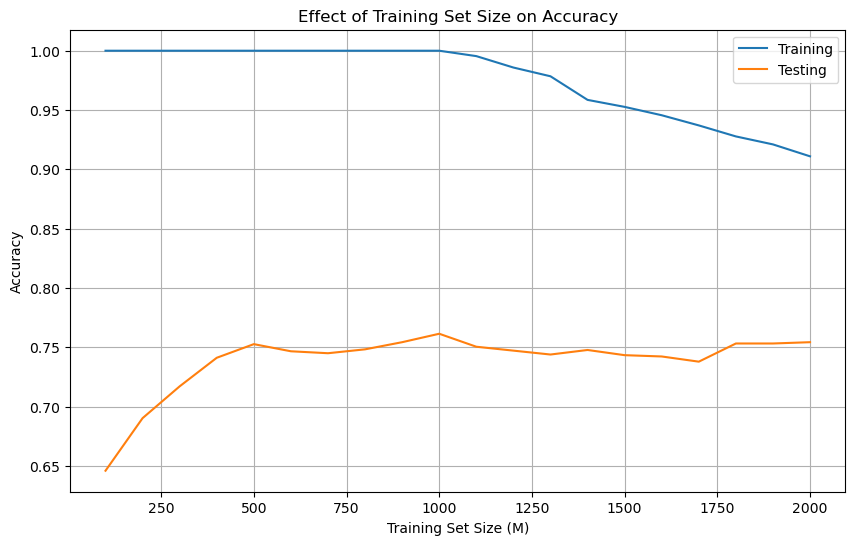

In [7]:
import sklearn.linear_model

trainingAccuracies = []
testingAccuracies = []
Mvalues = np.arange(100, 2001, 100)
for M in Mvalues:
    # Use only the first M training examples
    X_train_subset = trainingFaces[:M]
    y_train_subset = trainingLabels[:M]
    
    # Train the model
    logisticRegressor = sklearn.linear_model.LogisticRegression(max_iter=500)
    logisticRegressor.fit(X_train_subset, y_train_subset)
    
    # Calculate training accuracy on the subset used for training
    y_train_pred = logisticRegressor.predict(X_train_subset)
    train_accuracy = np.mean(y_train_pred == y_train_subset)
    
    # Calculate testing accuracy on the full test set
    y_test_pred = logisticRegressor.predict(testingFaces)
    test_accuracy = np.mean(y_test_pred == testingLabels)
    
    # Store the accuracies
    trainingAccuracies.append(train_accuracy)
    testingAccuracies.append(test_accuracy)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(Mvalues, trainingAccuracies, label="Training")
plt.plot(Mvalues, testingAccuracies, label="Testing")
plt.xlabel("Training Set Size (M)")
plt.ylabel("Accuracy")
plt.title("Effect of Training Set Size on Accuracy")
plt.legend()
plt.grid(True)
plt.show()

📢 **HAND-IN** 📢:
On Moodle, upload your plot.

## Task 2a: Examining the "Worst" Mistakes (2 pts)
You can sometimes learn something  about both the dataset and a trained model by examining its "worst"  mistakes, i.e., examples on which the model is *highly confident* but *wrong*.  For this purpose, you can call the LogisticRegressor.predict_proba function, which returns a probability in the interval (0,1) rather than a binary prediction.

**Your task**:
Find the top 25 *positively-labeled* examples in the test set on which the trained classifier (using M=2000) was *most confident* but *wrong*, i.e., yhat nearest to 0. Show these images and the machine's probability estimate yhat. Do the same thing for the top 25 *negatively-labeled* examples in the test set on which yhat was closest to 1.

What do you observe about these particular examples and their labels?

Positive examples misclassified with high confidence:


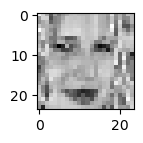

True label: 1, Predicted probability: 0.0000


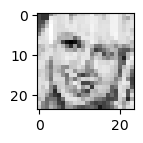

True label: 1, Predicted probability: 0.0001


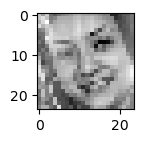

True label: 1, Predicted probability: 0.0001


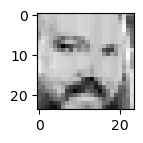

True label: 1, Predicted probability: 0.0001


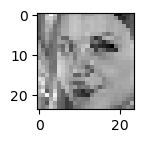

True label: 1, Predicted probability: 0.0003


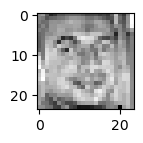

True label: 1, Predicted probability: 0.0003


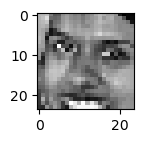

True label: 1, Predicted probability: 0.0003


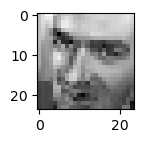

True label: 1, Predicted probability: 0.0004


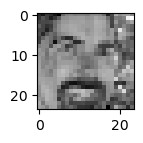

True label: 1, Predicted probability: 0.0005


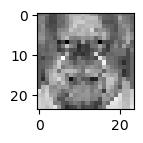

True label: 1, Predicted probability: 0.0005


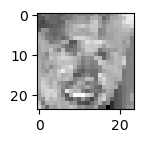

True label: 1, Predicted probability: 0.0005


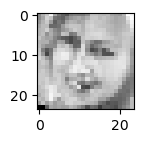

True label: 1, Predicted probability: 0.0006


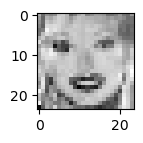

True label: 1, Predicted probability: 0.0006


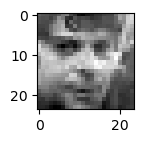

True label: 1, Predicted probability: 0.0008


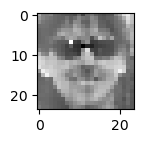

True label: 1, Predicted probability: 0.0009


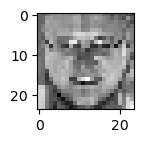

True label: 1, Predicted probability: 0.0009


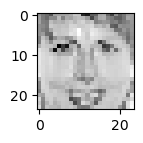

True label: 1, Predicted probability: 0.0009


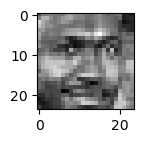

True label: 1, Predicted probability: 0.0010


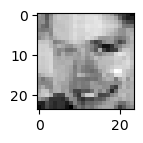

True label: 1, Predicted probability: 0.0013


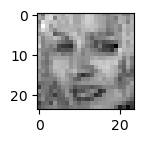

True label: 1, Predicted probability: 0.0015


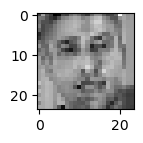

True label: 1, Predicted probability: 0.0016


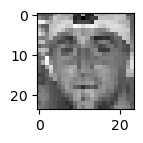

True label: 1, Predicted probability: 0.0018


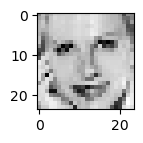

True label: 1, Predicted probability: 0.0018


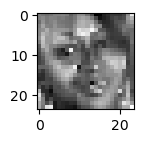

True label: 1, Predicted probability: 0.0022


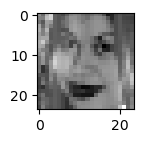

True label: 1, Predicted probability: 0.0023
Negative examples misclassified with high confidence:


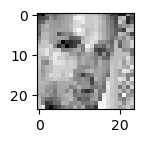

True label: 0, Predicted probability: 0.9972


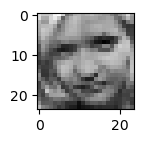

True label: 0, Predicted probability: 0.9978


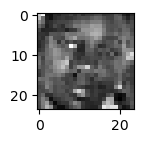

True label: 0, Predicted probability: 0.9981


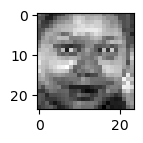

True label: 0, Predicted probability: 0.9983


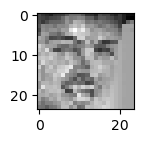

True label: 0, Predicted probability: 0.9983


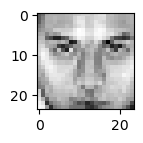

True label: 0, Predicted probability: 0.9986


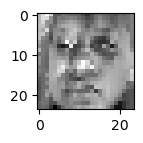

True label: 0, Predicted probability: 0.9986


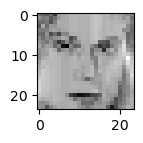

True label: 0, Predicted probability: 0.9986


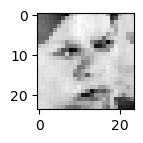

True label: 0, Predicted probability: 0.9989


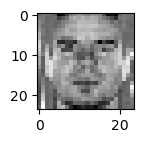

True label: 0, Predicted probability: 0.9990


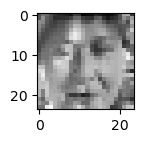

True label: 0, Predicted probability: 0.9990


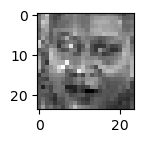

True label: 0, Predicted probability: 0.9993


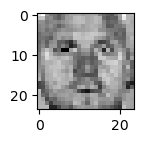

True label: 0, Predicted probability: 0.9995


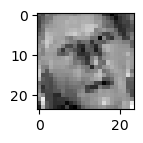

True label: 0, Predicted probability: 0.9996


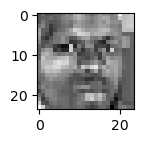

True label: 0, Predicted probability: 0.9997


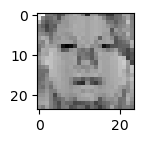

True label: 0, Predicted probability: 0.9998


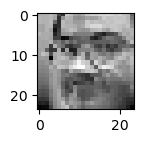

True label: 0, Predicted probability: 0.9999


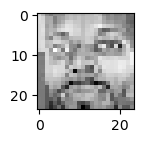

True label: 0, Predicted probability: 0.9999


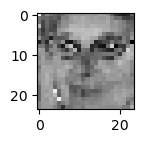

True label: 0, Predicted probability: 0.9999


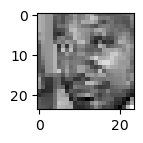

True label: 0, Predicted probability: 1.0000


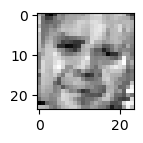

True label: 0, Predicted probability: 1.0000


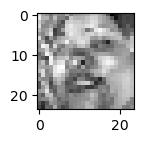

True label: 0, Predicted probability: 1.0000


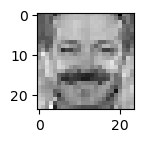

True label: 0, Predicted probability: 1.0000


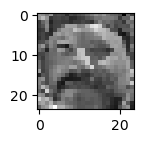

True label: 0, Predicted probability: 1.0000


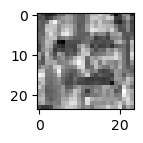

True label: 0, Predicted probability: 1.0000


In [8]:
# Train a model on the full training set
logisticRegressor = sklearn.linear_model.LogisticRegression(max_iter=500)
logisticRegressor.fit(trainingFaces[:2000], trainingLabels[:2000])

# Get probability predictions
yhat = logisticRegressor.predict_proba(testingFaces)[:,1]

# Utility method to plot the faces whose indices are specified in idxs
def show(idxs):
    for idx in idxs:
        fig, ax = plt.subplots(figsize=(1.25, 1.25))
        ax.imshow(testingFaces[idx,:].reshape(24,24), cmap='gray')
        plt.show()
        print(f"True label: {testingLabels[idx]}, Predicted probability: {yhat[idx]:.4f}")

# Find positive examples (label=1) where the model predicted low probabilities (closest to 0)
positive_idxs = np.where(testingLabels == 1)[0]
positive_probs = yhat[positive_idxs]
positive_worst_idxs = positive_idxs[np.argsort(positive_probs)[:25]]

# Find negative examples (label=0) where the model predicted high probabilities (closest to 1)
negative_idxs = np.where(testingLabels == 0)[0]
negative_probs = yhat[negative_idxs]
negative_worst_idxs = negative_idxs[np.argsort(negative_probs)[-25:]]

print("Positive examples misclassified with high confidence:")
show(positive_worst_idxs)

print("Negative examples misclassified with high confidence:")
show(negative_worst_idxs)

📢 **HAND-IN** 📢:
On Moodle, offer an explanation (referring to specific attributes of the faces, e.g., eye-glasses, lighting, etc.) about why those particular images were highly confident but incorrectly classified.

## Task 2b: Finding Least Confidently Predicted Examples
It can be instructive to find examples on which the trained classifier is uncertain/not confident. For this purpose, you can call the LogisticRegressor.predict_proba, which returns a probability in the interval (0,1) rather than a binary probability.

**Your task**:
Find the top 25 examples in the test set on which the trained classifier (using M=2000) was *least confident* (i.e., yhat closest to 0.5) in its prediction. Show these images, the machine's probabilistic prediction, and the true label. Do you see any reason why those images might cause the machine some "confusion"? (Note: there may not be an obvious answer, but you can still speculate.)

Examples with lowest confidence (closest to 0.5):


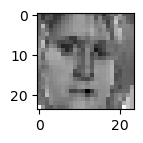

True label: 0, Predicted probability: 0.5002


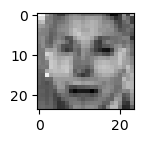

True label: 0, Predicted probability: 0.5007


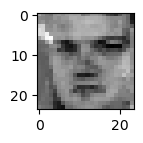

True label: 0, Predicted probability: 0.4992


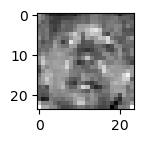

True label: 0, Predicted probability: 0.4992


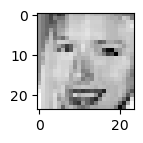

True label: 1, Predicted probability: 0.5021


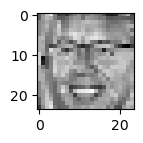

True label: 1, Predicted probability: 0.4966


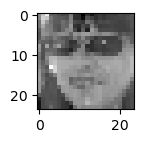

True label: 1, Predicted probability: 0.5039


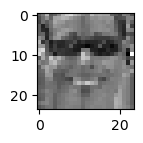

True label: 1, Predicted probability: 0.4946


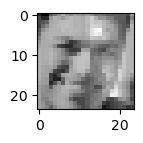

True label: 1, Predicted probability: 0.4934


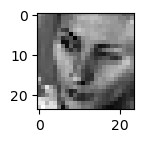

True label: 0, Predicted probability: 0.5072


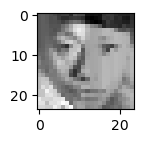

True label: 0, Predicted probability: 0.5076


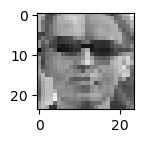

True label: 0, Predicted probability: 0.4924


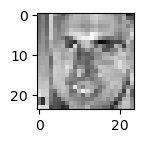

True label: 1, Predicted probability: 0.4920


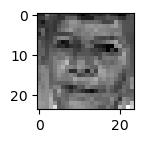

True label: 0, Predicted probability: 0.4864


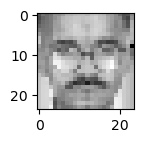

True label: 0, Predicted probability: 0.5140


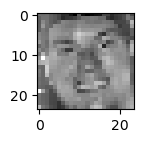

True label: 1, Predicted probability: 0.4858


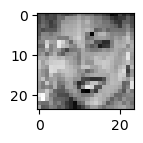

True label: 1, Predicted probability: 0.5147


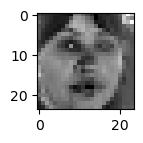

True label: 0, Predicted probability: 0.4839


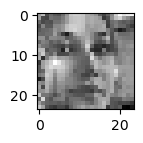

True label: 0, Predicted probability: 0.5186


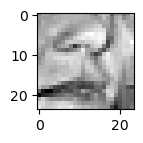

True label: 0, Predicted probability: 0.4813


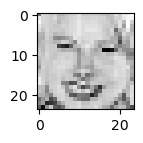

True label: 1, Predicted probability: 0.5199


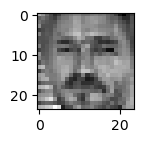

True label: 0, Predicted probability: 0.5204


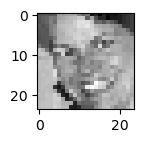

True label: 1, Predicted probability: 0.5207


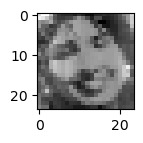

True label: 1, Predicted probability: 0.4782


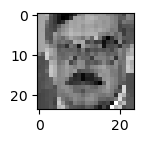

True label: 0, Predicted probability: 0.5230


In [9]:
# Calculate distance of each probability from 0.5
uncertainty = np.abs(yhat - 0.5)

# Get the indices of the 25 examples closest to 0.5
least_confident_idxs = np.argsort(uncertainty)[:25]

print("Examples with lowest confidence (closest to 0.5):")
show(least_confident_idxs)

You do not need to submit anything on Moodle for this task.

# Task 3: Data Augmentation (3 pts)
A perennial problem in machine learning is the lack of sufficient training data. One way to increase the amount of training data is to use **data augmentation**, i.e., to synthetically create more training examples from the ones that already exist. While this is possible only in certain situations, it can be very powerful. One setting in which it often is possible is when working with images. Face images in particular have a special kind of symmetry: if you "flip" a face left-to-right, then the person's facial expression basically remains the same.  This means that, by flipping a face image left-to-right, we can create another face image with the same training label -- *without* having to manually photograph and label that example ourselves.

Below is a Python function that takes an array (M x 576) of face images and returns another array of the same size and contents, except that all the images have been flipped left-to-right.

In [11]:
def flip (faces):
    faces = np.atleast_3d(faces)
    faces = faces.reshape(-1, 24, 24)  # convert faces from vectors to 2-d arrays
    faces = faces[:, :, ::-1]  # flip all the 2-d arrays left-to-right
    return faces.reshape(-1, 24**2)  # convert faces from 2-d arrays to vectors

Here's an example of an original and a flipped face:

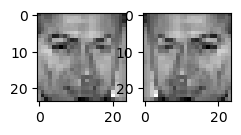

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(2.5, 2.5))
ax[0].imshow(trainingFaces[4,:].reshape(24, 24), cmap='gray')
ax[1].imshow(flip(trainingFaces[4,:]).reshape(24, 24), cmap='gray')
plt.show()

**Your task**: Using the flip function, try training on a larger dataset: the original training set was just 2000 images, but with this data augmentation technique, we can get up to 4000 images. Does training on this larger dataset improve testing accuracy? Create a plot similar to the one you made for Task 1b, but this time vary M up to 4000.

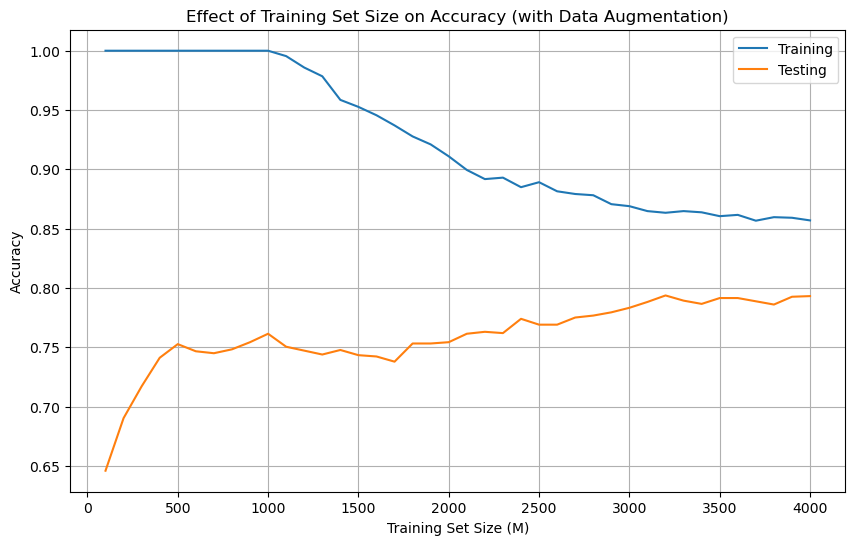

In [13]:
# Create an augmented training set by flipping all the original images
flipped_faces = flip(trainingFaces)
augmented_faces = np.vstack([trainingFaces, flipped_faces])
augmented_labels = np.hstack([trainingLabels, trainingLabels])

# Now run the experiment with the augmented dataset
trainingAccuracies = []
testingAccuracies = []
Mvalues = np.arange(100, 4001, 100)  # Now we can go up to 4000

for M in Mvalues:
    # Use only the first M training examples from the augmented set
    X_train_subset = augmented_faces[:M]
    y_train_subset = augmented_labels[:M]
    
    # Train the model
    logisticRegressor = sklearn.linear_model.LogisticRegression(max_iter=500)
    logisticRegressor.fit(X_train_subset, y_train_subset)
    
    # Calculate training accuracy on the subset used for training
    y_train_pred = logisticRegressor.predict(X_train_subset)
    train_accuracy = np.mean(y_train_pred == y_train_subset)
    
    # Calculate testing accuracy on the full test set
    y_test_pred = logisticRegressor.predict(testingFaces)
    test_accuracy = np.mean(y_test_pred == testingLabels)
    
    # Store the accuracies
    trainingAccuracies.append(train_accuracy)
    testingAccuracies.append(test_accuracy)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(Mvalues, trainingAccuracies, label="Training")
plt.plot(Mvalues, testingAccuracies, label="Testing")
plt.xlabel("Training Set Size (M)")
plt.ylabel("Accuracy")
plt.title("Effect of Training Set Size on Accuracy (with Data Augmentation)")
plt.legend()
plt.grid(True)
plt.show()

📢 **HAND-IN** 📢:
On Moodle, upload your plot (where M ranges up to 4000).

# Task 4: Pushing the Limits (4 pts)
Now that you've trained a logistic regression classifier on this task, see how far you can "push the limit" and train as accurate a classifier as possible. This task is open-ended: you can try hyperparameter optimization, new forms of data augmentation, or other techniques.

*Hyperparameter tuning*: You may be able to increase the accuracy by optimizing the amount of regularization. In sklearn, the regularization strength of the logistic regression classifier can be tuned by setting the C parameter in the constructor of LogisticRegression. To optimize hyperparameters in a principled way, we need three data sets: training, validation, and testing. However, the data you are provided with contains just training and testing sets. Hence, you should sub-divide the training data into two subsets: "real" training (this is what you call fit() on), and validation (which you use to estimate how good each hyperparameter configuration is). As a suggestion, try using 80% of trainingFaces and trainingLabels for training, and the remaining 20% for validation.

*Data augmentation*: In addition to left-right flips, you can also try adding a small amount of (typically Gaussian) random noise to each pixel (using a small standard deviation of the Gaussian distribution, so that the face images still looks like a face). See np.random.randn. In order to avoid manually overfitting to the test data, you should also experiment with different forms of data augmentation on a separate validation set; then, once you find a good method of augmentation, test out the resulting classifier on the testing set.

📢 **HAND-IN** 📢:
On Moodle, upload your code above, and report the final testing accuracy.

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(
    trainingFaces, trainingLabels, test_size=0.2, random_state=42
)

def add_noise(faces, std=0.05):
    noisy_faces = faces.copy()
    noise = np.random.randn(*noisy_faces.shape) * std
    noisy_faces = noisy_faces + noise
    noisy_faces = np.clip(noisy_faces, 0, 1)
    return noisy_faces

flipped_train = flip(X_train)
noisy_train = add_noise(X_train)
noisy_flipped_train = add_noise(flipped_train)

X_train_augmented = np.vstack([X_train, flipped_train, noisy_train, noisy_flipped_train])
y_train_augmented = np.hstack([y_train, y_train, y_train, y_train])

C_values = [0.001, 0.01, 0.1, 1, 10, 100]
best_val_accuracy = 0
best_C = None

for C in C_values:
    model = sklearn.linear_model.LogisticRegression(C=C, max_iter=1000)
    model.fit(X_train_augmented, y_train_augmented)
    
    val_pred = model.predict(X_val)
    val_accuracy = np.mean(val_pred == y_val)
    print(f"C={C}, Validation Accuracy: {val_accuracy:.4f}")
    
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        best_C = C

print(f"Best C: {best_C}, Best Validation Accuracy: {best_val_accuracy:.4f}")

full_flipped = flip(trainingFaces)
full_noisy = add_noise(trainingFaces)
full_noisy_flipped = add_noise(full_flipped)
X_final_augmented = np.vstack([trainingFaces, full_flipped, full_noisy, full_noisy_flipped])
y_final_augmented = np.hstack([trainingLabels, trainingLabels, trainingLabels, trainingLabels])

final_model = sklearn.linear_model.LogisticRegression(C=best_C, max_iter=1000)
final_model.fit(X_final_augmented, y_final_augmented)

test_pred = final_model.predict(testingFaces)
final_test_accuracy = np.mean(test_pred == testingLabels)
print(f"Final test accuracy: {final_test_accuracy:.4f}")

C=0.001, Validation Accuracy: 0.7775
C=0.01, Validation Accuracy: 0.7800
C=0.1, Validation Accuracy: 0.7750
C=1, Validation Accuracy: 0.7600
C=10, Validation Accuracy: 0.7575
C=100, Validation Accuracy: 0.7575
Best C: 0.01, Best Validation Accuracy: 0.7800
Final test accuracy: 0.8189
